# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = (city_weather["main"]["temp_max"])
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as Er:
        print(Er)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | santa elena de uairen
Processing Record 5 of Set 1 | mountain home
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | san jose ixtapa (barrio viejo)
'coord'
City not found. Skipping...
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | tranovaho
'coord'
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | santo antonio
Processing Record 16 of Set 1 | salinopolis
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | ola
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lata,40.1629,-8.3327,289.86,89,100,3.67,PT,1698426105
1,mar del plata,-38.0023,-57.5575,299.00,44,20,9.26,AR,1698426029
2,st. john's,47.5649,-52.7093,282.41,76,75,4.47,CA,1698425989
3,santa elena de uairen,4.6167,-61.1333,303.01,44,83,4.05,VE,1698426105
4,mountain home,43.1330,-115.6912,278.23,63,4,0.89,US,1698426105


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,289.86,89,100,3.67,PT,1698426105
1,mar del plata,-38.0023,-57.5575,299.00,44,20,9.26,AR,1698426029
2,st. john's,47.5649,-52.7093,282.41,76,75,4.47,CA,1698425989
3,santa elena de uairen,4.6167,-61.1333,303.01,44,83,4.05,VE,1698426105
4,mountain home,43.1330,-115.6912,278.23,63,4,0.89,US,1698426105


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

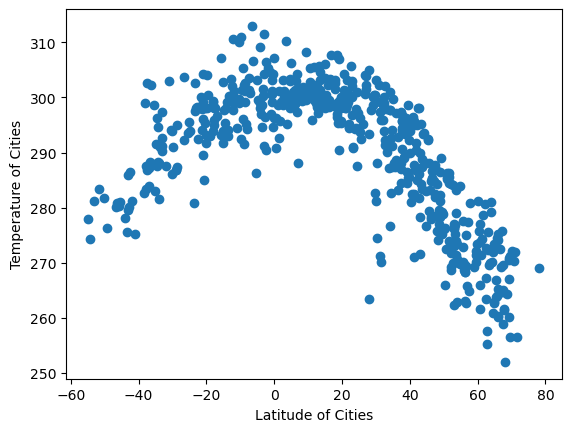

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Temperature of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

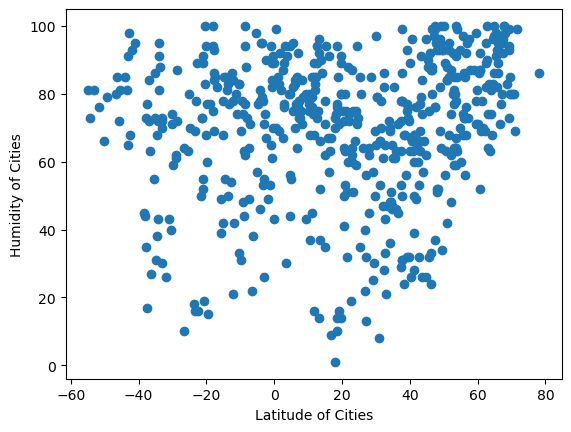

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

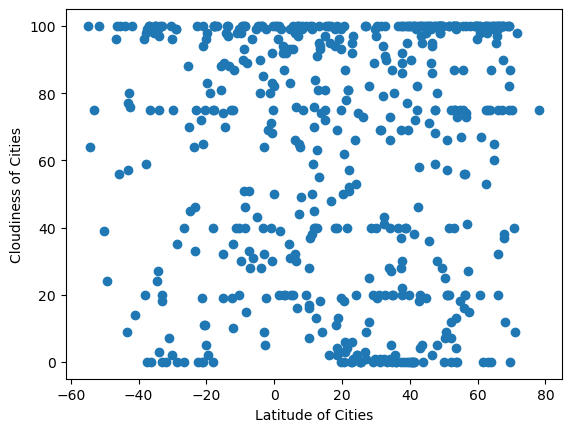

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

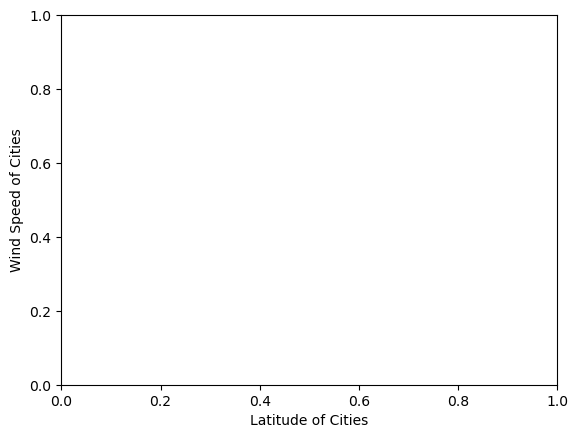

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]
plt.scatter = (latitude, windspeed)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Wind Speed of Cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=.5)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="black")
    plt.xlabel("Latitude of Cities")
    plt.ylabel(title)
    #print(f"The r-value is:")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"] >= 0]

northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lata,40.1629,-8.3327,289.86,89,100,3.67,PT,1698426105
2,st. john's,47.5649,-52.7093,282.41,76,75,4.47,CA,1698425989
3,santa elena de uairen,4.6167,-61.1333,303.01,44,83,4.05,VE,1698426105
4,mountain home,43.1330,-115.6912,278.23,63,4,0.89,US,1698426105
6,lerwick,60.1545,-1.1494,281.15,71,100,3.82,GB,1698426106


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"] <= 0]

southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,299.00,44,20,9.26,AR,1698426029
5,port-aux-francais,-49.3500,70.2167,276.36,79,24,7.22,TF,1698426105
7,adamstown,-25.0660,-130.1015,295.50,80,70,2.26,PN,1698426106
8,puerto natales,-51.7236,-72.4875,283.40,76,100,9.77,CL,1698425824
9,edinburgh of the seven seas,-37.0676,-12.3116,287.23,84,100,13.88,SH,1698426106


###  Temperature vs. Latitude Linear Regression Plot

TypeError: linregress() missing 2 required positional arguments: 'title' and 'text_coordinates'

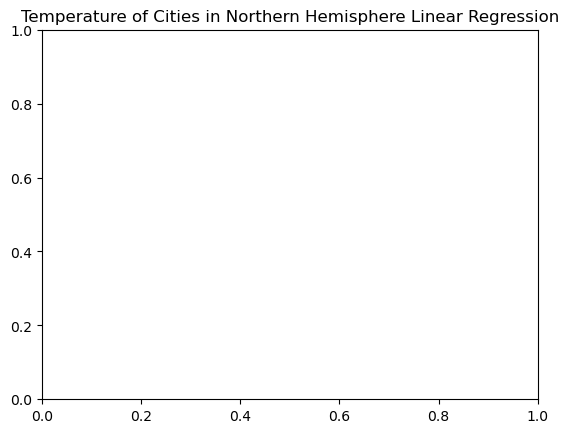

In [28]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Temperature of Cities in Northern Hemisphere Linear Regression")
lin_regress(x_values, y_values, "Temperature", (1, -40))



# Incorporate the other graph properties
#plt.xlabel("Latitude of Cities")
#plt.ylabel("Temperature of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = southern_hemi_df["Lat"]
temperature = southern_hemi_df["Max Temp"]
plt.scatter(latitude, temperature)
x = latitude
y = temperature
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Temperature of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
plt.scatter(latitude, humidity)
x = latitude
y = humidity
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
plt.scatter(latitude, humidity)
x = latitude
y = humidity
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness)
x = latitude
y = cloudiness
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness)
x = latitude
y = cloudiness
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = northern_hemi_df["Lat"]
windspeed = northern_hemi_df["Wind Speed"]
plt.scatter(latitude, windspeed)
x = latitude
y = windspeed
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Windspeed of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
latitude = southern_hemi_df["Lat"]
windspeed = southern_hemi_df["Wind Speed"]
plt.scatter(latitude, windspeed)
x = latitude
y = windspeed
plt.plot(x, y)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Windspeed of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE